In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'lines.linewidth': 2,
      'figure.figsize': (15, 7),
          'grid.color': 'white',
          'axes.axisbelow': False,
          'axes.grid': True,
          'axes.grid.axis': 'y',
     'axes.labelsize': 'x-large',
     'axes.titlesize':'xx-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
figsize=(15,7)

In [3]:
df = pd.read_csv('final_df_1.csv')

In [4]:
df = df.set_index('Unnamed: 0')

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.index.name=None

In [7]:
df.head()

,hourly_demand,temp,dwpt,rhum,wspd,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol,daily_peak,dayofweek,daytype
2005-01-01 01:00:00,23715.488663,64.4,64.4,100.0,4.722420,1,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend
2005-01-01 02:00:00,22823.712923,64.4,64.4,100.0,6.959355,2,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend
2005-01-01 03:00:00,21882.924807,64.4,64.4,100.0,5.840887,3,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend
2005-01-01 04:00:00,21229.184273,62.6,62.6,100.0,8.077823,4,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend
2005-01-01 05:00:00,20940.912981,62.6,62.6,100.0,4.722420,5,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend


In [8]:
df = df[['hourly_demand', 'temp', 'wspd', 'daytype', 'stat_hol']]

df.head()

,hourly_demand,temp,wspd,daytype,stat_hol
2005-01-01 01:00:00,23715.488663,64.4,4.722420,Weekend,True
2005-01-01 02:00:00,22823.712923,64.4,6.959355,Weekend,True
2005-01-01 03:00:00,21882.924807,64.4,5.840887,Weekend,True
2005-01-01 04:00:00,21229.184273,62.6,8.077823,Weekend,True
2005-01-01 05:00:00,20940.912981,62.6,4.722420,Weekend,True


In [9]:
df['sin_hour'] = np.sin(2*np.pi*df.index.hour.values/24)
df['cos_hour'] = np.cos(2*np.pi*df.index.hour.values/24)
df.head()

,hourly_demand,temp,wspd,daytype,stat_hol,sin_hour,cos_hour
2005-01-01 01:00:00,23715.488663,64.4,4.722420,Weekend,True,0.258819,0.965926
2005-01-01 02:00:00,22823.712923,64.4,6.959355,Weekend,True,0.500000,0.866025
2005-01-01 03:00:00,21882.924807,64.4,5.840887,Weekend,True,0.707107,0.707107
2005-01-01 04:00:00,21229.184273,62.6,8.077823,Weekend,True,0.866025,0.500000
2005-01-01 05:00:00,20940.912981,62.6,4.722420,Weekend,True,0.965926,0.258819


In [10]:
df['daytype'] = np.where(df['daytype']=='Weekday', 0, 1)
df['stat_hol'] = df['stat_hol'].astype(int)

In [11]:
df.head()

,hourly_demand,temp,wspd,daytype,stat_hol,sin_hour,cos_hour
2005-01-01 01:00:00,23715.488663,64.4,4.722420,1,1,0.258819,0.965926
2005-01-01 02:00:00,22823.712923,64.4,6.959355,1,1,0.500000,0.866025
2005-01-01 03:00:00,21882.924807,64.4,5.840887,1,1,0.707107,0.707107
2005-01-01 04:00:00,21229.184273,62.6,8.077823,1,1,0.866025,0.500000
2005-01-01 05:00:00,20940.912981,62.6,4.722420,1,1,0.965926,0.258819


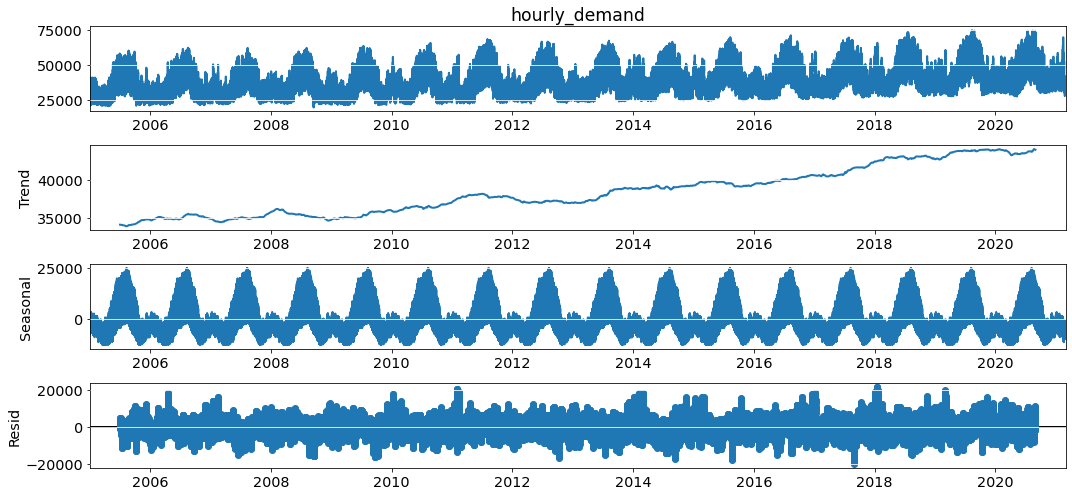

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['hourly_demand'], period=8760)
result.plot()
plt.show()

In [13]:
df_norm = df.copy()
hourly_demand_min, hourly_demand_max = df['hourly_demand'].min(), df['hourly_demand'].max()
temp_min, temp_max = df['temp'].min(), df['temp'].max()
wspd_min, wspd_max = df['wspd'].min(), df['wspd'].max()

df_norm['hourly_demand'] = (df['hourly_demand'] - hourly_demand_min) / (hourly_demand_max - hourly_demand_min)
df_norm['temp'] = (df['temp'] - temp_min) / (temp_max - temp_min)
df_norm['wspd'] = (df['wspd'] - wspd_min) / (wspd_max - wspd_min)

df_norm.head()

,hourly_demand,temp,wspd,daytype,stat_hol,sin_hour,cos_hour
2005-01-01 01:00:00,0.073533,0.549020,0.034234,1,1,0.258819,0.965926
2005-01-01 02:00:00,0.057317,0.549020,0.050450,1,1,0.500000,0.866025
2005-01-01 03:00:00,0.040210,0.549020,0.042342,1,1,0.707107,0.707107
2005-01-01 04:00:00,0.028322,0.529412,0.058559,1,1,0.866025,0.500000
2005-01-01 05:00:00,0.023081,0.529412,0.034234,1,1,0.965926,0.258819


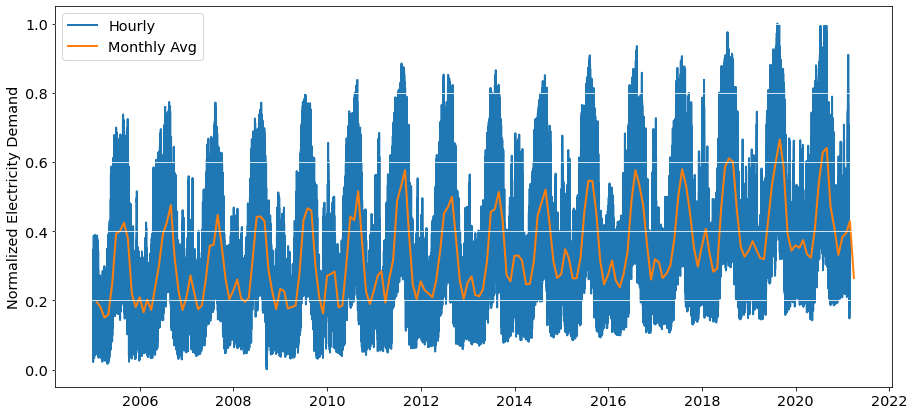

In [14]:
monthly_norm = df_norm['hourly_demand'].resample('M').mean()
plt.plot(df_norm['hourly_demand'], label='Hourly')
plt.plot(monthly_norm, label='Monthly Avg')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

In [62]:
train = monthly_norm[:'2017']
validate = monthly_norm['2018':'2019']
test = monthly_norm['2020':]

In [63]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [31]:
def get_sarima_mae(y_train, hyp, y_test):
    try:
        model = SARIMAX(y_train, order=(hyp[0],hyp[1],hyp[2]), seasonal_order=(hyp[3],hyp[4],hyp[5],12)).fit()
        y_hat = model.get_forecast(steps=len(y_test)).predicted_mean
        return np.mean(np.abs(y_hat - y_test))
    except:
        return None

p = d = q = P = D = Q = range(3)
hyp_list = list(product(p, d, q, P, D, Q))
grid_search = pd.DataFrame(columns=['p','d','q','P','D','Q','mae'])

for i, hp in enumerate(hyp_list):
    mae = get_sarima_mae(train, hp, validate)
    if mae != None:
        params = {'p':hyp[0], 'd':hyp[1], 'q':hyp[2], 'P':hyp[3], 'D':hyp[4], 'Q':hyp[5], 'mae':mae}
        grid_search = grid_search.append(params, ignore_index=True)

grid_search.sort_values('mae').head(1)

,p,d,q,P,D,Q,mae
219,0.0,2.0,2.0,0.0,1.0,1.0,0.023362


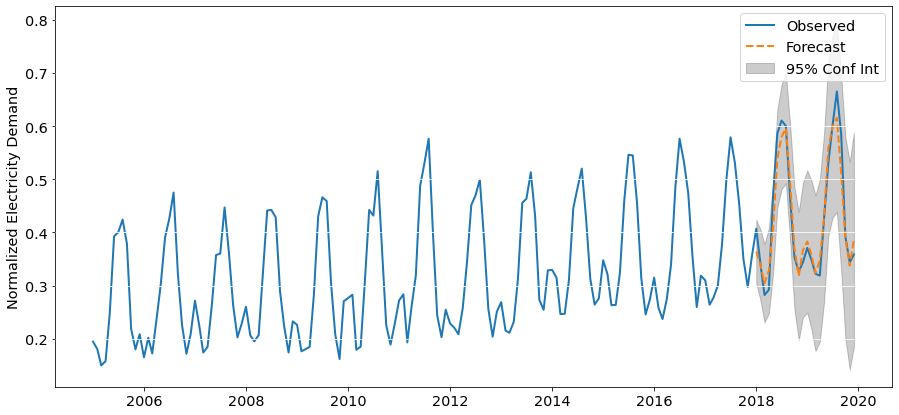

In [64]:
best_monthly_order = (0, 2, 2)
best_monthly_seas_order = (0,1,1,12)

# fit SARIMA model
model_m = SARIMAX(train, order=best_monthly_order, seasonal_order=best_monthly_seas_order).fit()

# get forecast and confidence interval for forecast
forecast = model_m.get_forecast(steps=len(validate))
pred = pd.Series(forecast.predicted_mean, index=validate.index)
ci = forecast.conf_int(alpha=0.05)

# plotting
plt.plot(monthly_norm[:'2019'], label='Observed')
plt.plot(pred, label='Forecast', ls='--')
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1],
                 color='k', alpha=0.2, label='95% Conf Int')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

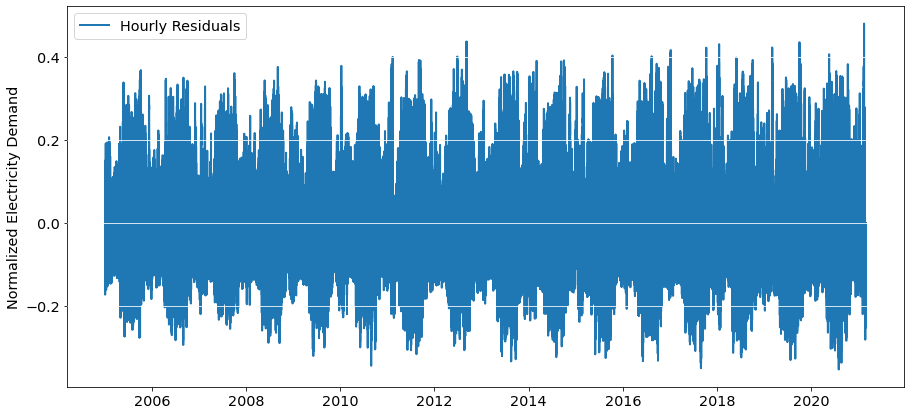

In [33]:
hourly_res_norm = df_norm.copy()
hourly_res_norm['hourly_demand'] = df_norm['hourly_demand'].groupby(pd.Grouper(freq='M')).transform(lambda x: x - x.mean())
plt.plot(hourly_res_norm['hourly_demand'], label='Hourly Residuals')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

In [34]:
train = hourly_res_norm[:'2017']
validate = hourly_res_norm['2018':'2019']
test = hourly_res_norm['2020':]

In [35]:
exog_tr = train.iloc[:,1:].values
ar_tr = train['hourly_demand'].shift().bfill().values[:,None]

X_tr = np.hstack([ar_tr, exog_tr])
y_tr = train['hourly_demand'].values


exog_val = validate.iloc[:,1:].values
y_val = validate['hourly_demand'].values

exog_te = test.iloc[:,1:].values

In [36]:
yp_full = hourly_res_norm.loc[:'2019','hourly_demand']
yp_val = hourly_res_norm.loc['2018':'2019','hourly_demand']
yp_te = hourly_res_norm.loc['2020':,'hourly_demand']

y_init_val = np.hstack([y_tr[-1], validate.iloc[167::168,0].values])
y_init_te = np.hstack([y_val[-1], test.iloc[167::168,0].values])

In [37]:
def compute_mae(y, yhat):
    return np.mean(np.abs(yhat - y))

def forecast(model, exog, y_init):
    yhat = []
    Xi_te = np.hstack([y_init, exog[0]])[None,:]
    for i in range(len(exog)-1):
        yhat_i = model.predict(Xi_te)[0]
        yhat.append(yhat_i)
        Xi_te = np.hstack([yhat_i, exog[i+1]])[None,:]
    yhat.append(model.predict(Xi_te)[0])
    return np.array(yhat)

def weekly_forecast(model, exog, y_init):
    yhat = []
    for i, yi in enumerate(y_init):
        exog_i = exog[168*i:168*(i+1),:]
        if exog_i.shape[0] < 1:
            break
        yhat.append(forecast(model, exog_i, yi))
    return np.hstack(yhat)

def plot_full(y, yhat, yhat_idx):
    pred = pd.Series(yhat, index=yhat_idx)
    plt.figure()
    plt.plot(y, label='Observed')
    plt.plot(pred, label='Forecast', ls='--')
    plt.ylabel('Normalized Hourly Residual Electricity Demand')
    plt.legend()
    
def plot_week(y, yhat, yhat_idx):
    pred = pd.Series(yhat, index=yhat_idx)
    fig = plt.figure();
    plt.plot(y['2019-12-01':'2019-12-07'], label='Observed')
    plt.plot(pred['2019-12-01':'2019-12-07'], label='Forecast', ls='--')
    plt.ylabel('Normalized Hourly Residual Electricity Demand')
    plt.legend()
    fig.autofmt_xdate()

MAE: 0.12013700567584795


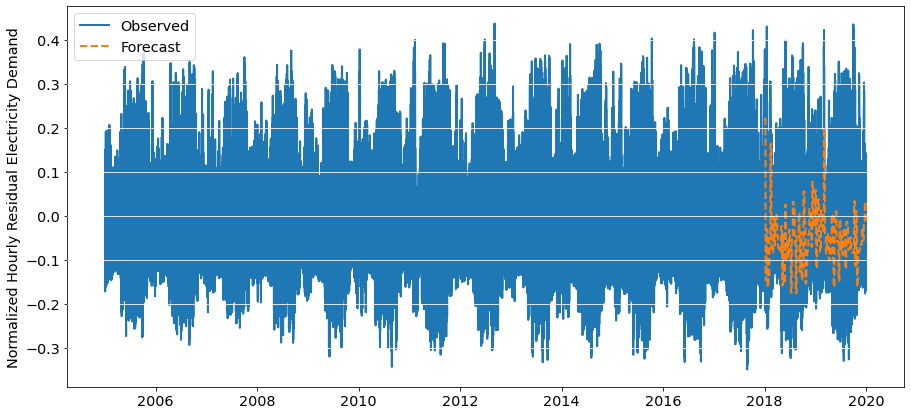

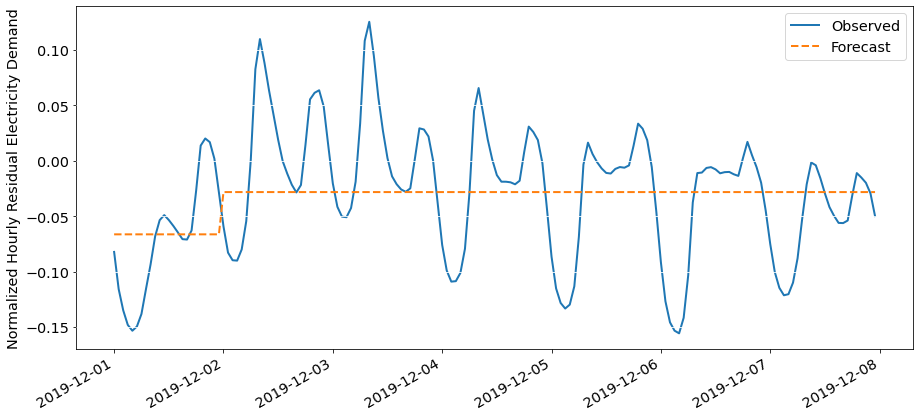

In [38]:
idx = validate.index[::168]
idx = idx.append(pd.DatetimeIndex(['2019-12-31 23']))
pred = pd.Series(np.hstack([y_init_val, yp_val.iloc[-1]]), index=idx)
pred = pred.resample('H').ffill().values

print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

MAE: 0.07605024654913634


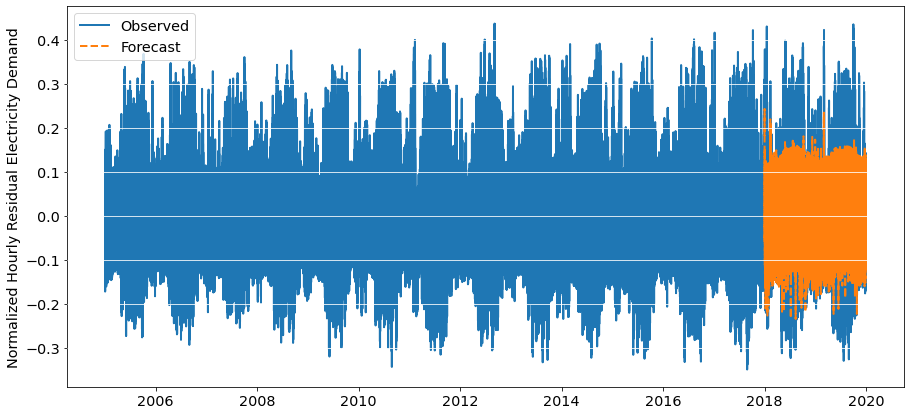

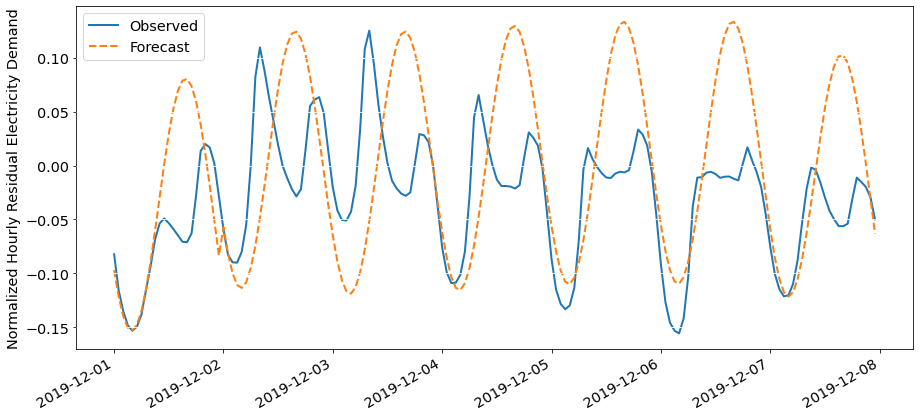

In [39]:
from sklearn.linear_model import LinearRegression

mod_lr = LinearRegression()
mod_lr.fit(X_tr, y_tr)
pred = weekly_forecast(mod_lr, exog_val, y_init_val)

print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

def get_gbr_mae(lr, ne, md):
    mod = GradientBoostingRegressor(learning_rate=lr, n_estimators=ne, max_depth=md)
    mod.fit(X_tr, y_tr)
    pred_val = weekly_forecast(mod, exog_val, y_init_val)
    return compute_mae(y_val, pred_val)

learning_rate = [0.01, 0.1, 1.]
n_estimators = [100, 500, 1000]
max_depth = [2, 3, 4]
grid_search = pd.DataFrame(columns=['lr','ne','md','mae'])

for lr in learning_rate:    
    for ne in n_estimators:        
        for md in max_depth:            
            mae = get_gbr_mae(lr, ne, md)
            params = {'lr':lr, 'ne':ne, 'md':md, 'mae':mae} 
            grid_search = grid_search.append(params, ignore_index=True)

grid_search.sort_values('mae').head(1)

,lr,ne,md,mae
10,0.1,100.0,3.0,0.06422


MAE: 0.06421952309828537


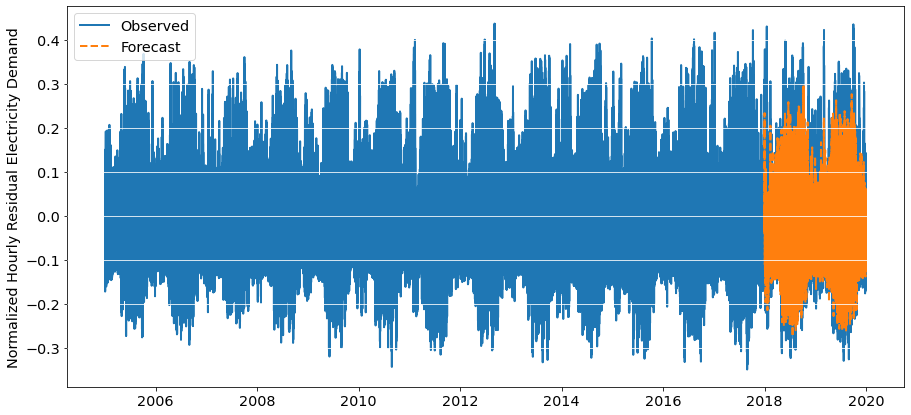

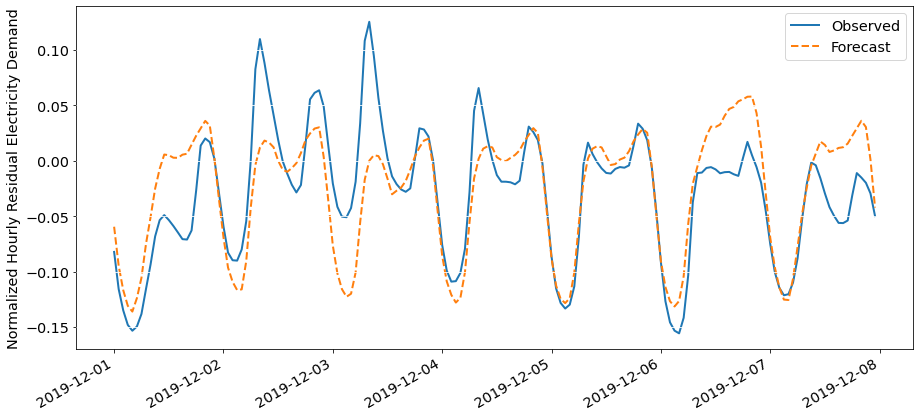

In [41]:
lr, ne, md = 0.1, 100, 3

mod_gbr = GradientBoostingRegressor(learning_rate=lr, n_estimators=ne, max_depth=md)
mod_gbr.fit(X_tr, y_tr)
pred = weekly_forecast(mod_gbr, exog_val, y_init_val)

print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

In [42]:
from sklearn.neural_network import MLPRegressor

def get_mlp_mae(hl, a, lr, mi):
    mod = MLPRegressor(hidden_layer_sizes=hl, alpha=a, learning_rate_init=lr, max_iter=mi)
    mod.fit(X_tr, y_tr)
    pred_val = weekly_forecast(mod, exog_val, y_init_val)
    return compute_mae(y_val, pred_val)

hidden_layer_sizes = [(100,),(500,),(100,10,),(100,100,)]
alpha = [0.0001, 0.00001, 0.001]
learning_rate = [0.0001, 0.001, 0.01]
max_iter = [200, 1000, 10000]
grid_search = pd.DataFrame(columns=['hl','a','lr','mi','mae'])

for hl in hidden_layer_sizes:    
    for a in alpha:        
        for lr in learning_rate:
            for mi in max_iter:
                mae = get_mlp_mae(hl, a, lr, mi)
                params = {'hl':hl, 'a':a, 'lr':lr, 'mi':mi, 'mae':mae} 
                grid_search = grid_search.append(params, ignore_index=True)

grid_search.sort_values('mae').head(1)

,hl,a,lr,mi,mae
72,"(100, 10)",0.001,0.0001,200,0.064415


MAE: 0.06850253063279055


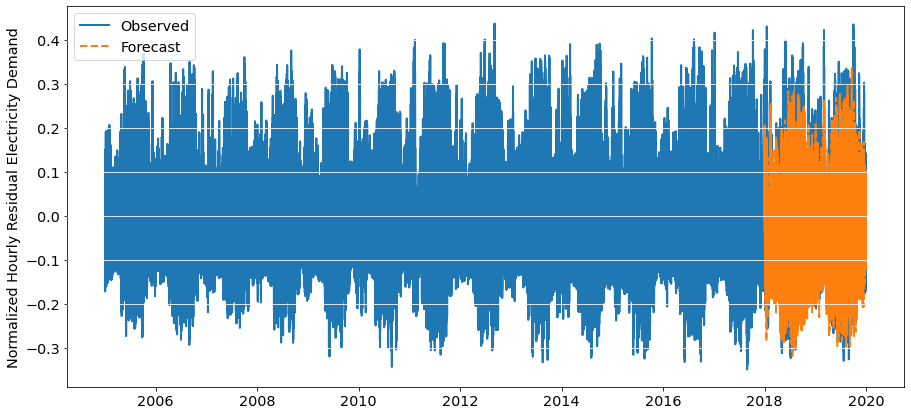

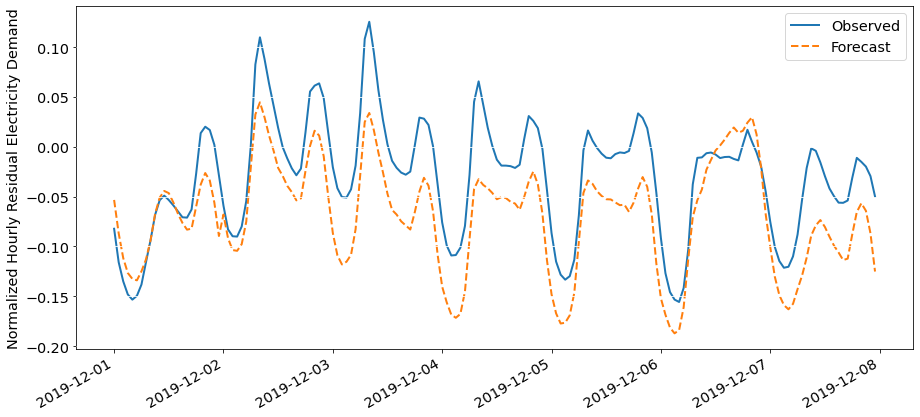

In [47]:
hl, a, lr, mi  = 100, 0.001, 0.0001, 200

mod_mlp = MLPRegressor(hidden_layer_sizes=hl, alpha=a, learning_rate_init=lr, max_iter=mi)
mod_mlp.fit(X_tr, y_tr)
pred = weekly_forecast(mod_mlp, exog_val, y_init_val)

print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

In [44]:
train_m = monthly_norm[:'2019']
test_m = monthly_norm['2020':]
model_m = SARIMAX(train_m, order=best_monthly_order, seasonal_order=best_monthly_seas_order).fit()
forecast_m = model_m.get_forecast(steps=len(test_m))
pred_m_norm = pd.Series(forecast_m.predicted_mean, index=test_m.index)

idx = test.index[::168]
idx = idx.append(pd.DatetimeIndex(['2021-03-01 00']))
pred_base = pd.Series(np.hstack([y_init_te, yp_te.iloc[-1]]), index=idx)
pred_base = pred_base.resample('H').ffill().values

pred_lr = weekly_forecast(mod_lr, exog_te, y_init_te)
pred_gbr = weekly_forecast(mod_gbr, exog_te, y_init_te)
pred_mlp = weekly_forecast(mod_mlp, exog_te, y_init_te)

In [45]:
m_norm_df = pd.DataFrame({'m_norm':pred_m_norm, 'month':pred_m_norm.index.month, 'year':pred_m_norm.index.year})

bl_norm_df = pd.DataFrame({'h_norm':pred_base, 'month':test.index.month, 'year':test.index.year})
pred_bl_norm_df = bl_norm_df.merge(m_norm_df, on=['month','year'])
pred_bl_norm = pd.Series((pred_bl_norm_df['m_norm'] + pred_bl_norm_df['h_norm']).values, index=test.index)
pred_bl = pred_bl_norm * (hourly_demand_max - hourly_demand_min) + hourly_demand_min

lr_norm_df = pd.DataFrame({'h_norm':pred_lr, 'month':test.index.month, 'year':test.index.year})
pred_lr_norm_df = lr_norm_df.merge(m_norm_df, on=['month','year'])
pred_lr_norm = pd.Series((pred_lr_norm_df['m_norm'] + pred_lr_norm_df['h_norm']).values, index=test.index)
pred_lr = pred_lr_norm * (hourly_demand_max - hourly_demand_min) + hourly_demand_min

gbr_norm_df = pd.DataFrame({'h_norm':pred_gbr, 'month':test.index.month, 'year':test.index.year})
pred_gbr_norm_df = gbr_norm_df.merge(m_norm_df, on=['month','year'])
pred_gbr_norm = pd.Series((pred_gbr_norm_df['m_norm'] + pred_gbr_norm_df['h_norm']).values, index=test.index)
pred_gbr = pred_gbr_norm * (hourly_demand_max - hourly_demand_min) + hourly_demand_min

mlp_norm_df = pd.DataFrame({'h_norm':pred_mlp, 'month':test.index.month, 'year':test.index.year})
pred_mlp_norm_df = mlp_norm_df.merge(m_norm_df, on=['month','year'])
pred_mlp_norm = pd.Series((pred_mlp_norm_df['m_norm'] + pred_mlp_norm_df['h_norm']).values, index=test.index)
pred_mlp = pred_mlp_norm * (hourly_demand_max - hourly_demand_min) + hourly_demand_min

In [46]:
def compute_mape(y, yhat):
    pct_err = ((yhat - y) / y).dropna()
    return np.mean(np.abs(pct_err)) 

print("baseline MAPE:", compute_mape(df['hourly_demand'], pred_bl))
print("lin reg MAPE:", compute_mape(df['hourly_demand'], pred_lr))
print("grad boost reg MAPE:", compute_mape(df['hourly_demand'], pred_gbr))
print("MLP reg MAPE:", compute_mape(df['hourly_demand'], pred_mlp))

baseline MAPE: 0.13591681486683307
lin reg MAPE: 0.0967462487426138
grad boost reg MAPE: 0.08176383574755698
MLP reg MAPE: 0.1613912380842806
